<a href="https://colab.research.google.com/github/chipojaya1/myNEBDHub/blob/main/Japan_case_study_Milestone_%232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📈 ## <font color='crimson'>**Milestone #2 - Applying Analytical Strategies**</font>

Key question:
*Did Japan’s policy stringency have an impact on COVID-19 case patterns?*

### Getting Started

In [ ]:
# Getting started
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading necessary libraries for time series analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]

# Load and prepare data
df_jp = pd.read_csv('/content/drive/MyDrive/Analyzing_Pandemic_Responses/data/df_clean.csv')
df_jp['Date'] = pd.to_datetime(df_jp['Date'])
df_jp = df_jp.set_index('Date')

#### **Time Series Analysis**

**Data Prep**

In [ ]:
# Create weekly aggregated data
wk = pd.DataFrame({
    'weekly_cases': df_jp['DailyCases'].resample('W-SUN').sum(),
    'stringency_wk': df_jp['StringencyIndex_Average'].resample('W-SUN').mean()
}).dropna()

# Smoothing for trend visualization
wk['cases_7w'] = wk['weekly_cases'].rolling(3, min_periods=1).mean()
wk = wk.asfreq('W-SUN')

=== TIME SERIES DECOMPOSITION ===
Deconstructing data into trend, seasonal, and residual components...


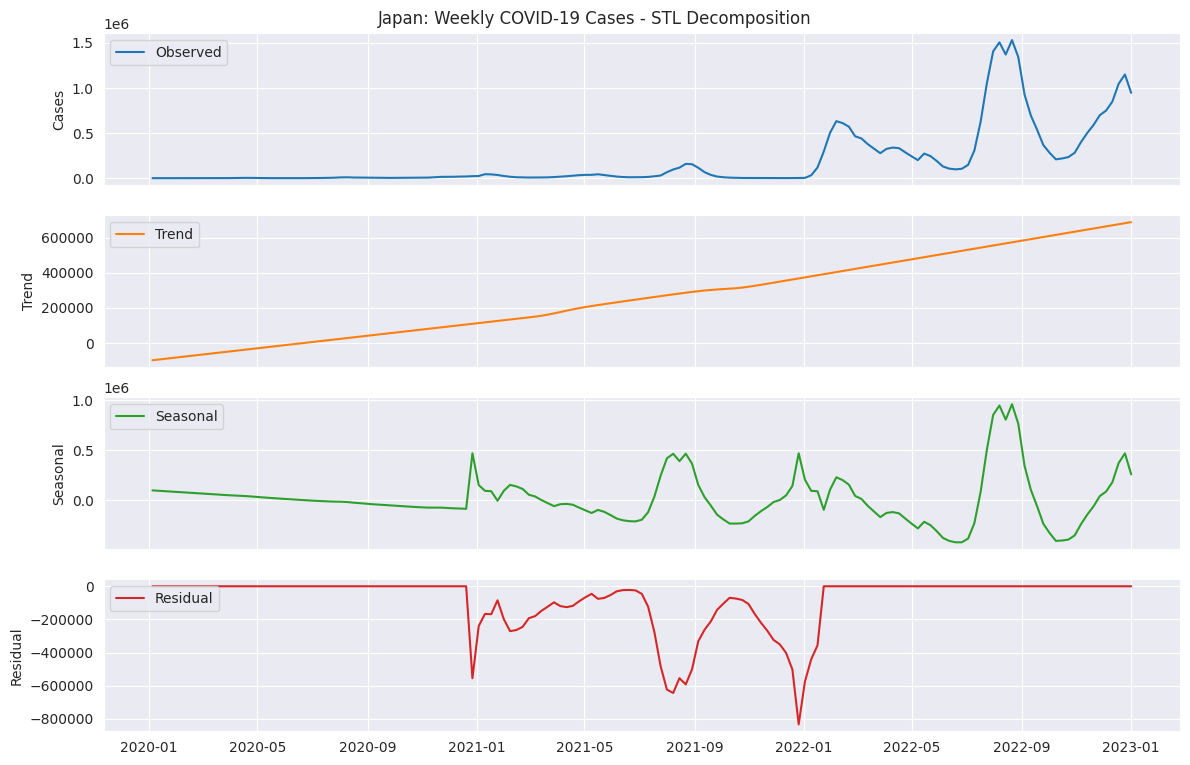

✓ Decomposition completed: Separated into trend, seasonal, and residual components
✓ Why it matters: Helps identify underlying patterns beyond random fluctuations


In [ ]:
print("=== TIME SERIES DECOMPOSITION ===")
print("Deconstructing data into trend, seasonal, and residual components...")

# STL Decomposition
y = wk['weekly_cases'].astype(float).fillna(0.0)
stl = STL(y, period=52, robust=True)  # 52 weeks for yearly seasonality
res = stl.fit()

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
axes[0].plot(wk.index, res.observed, label='Observed')
axes[0].set_ylabel('Cases')
axes[0].legend(loc='upper left')

axes[1].plot(wk.index, res.trend, color='C1', label='Trend')
axes[1].set_ylabel('Trend')
axes[1].legend(loc='upper left')

axes[2].plot(wk.index, res.seasonal, color='C2', label='Seasonal')
axes[2].set_ylabel('Seasonal')
axes[2].legend(loc='upper left')

axes[3].plot(wk.index, res.resid, color='C3', label='Residual')
axes[3].set_ylabel('Residual')
axes[3].legend(loc='upper left')

plt.suptitle('Japan: Weekly COVID-19 Cases - STL Decomposition', y=0.95)
plt.tight_layout()
plt.show()

print("✓ Decomposition completed: Separated into trend, seasonal, and residual components")
print("✓ Why it matters: Helps identify underlying patterns beyond random fluctuations")

## Trend Analysis


=== TREND ANALYSIS ===
Identifying long-term patterns in COVID-19 cases...


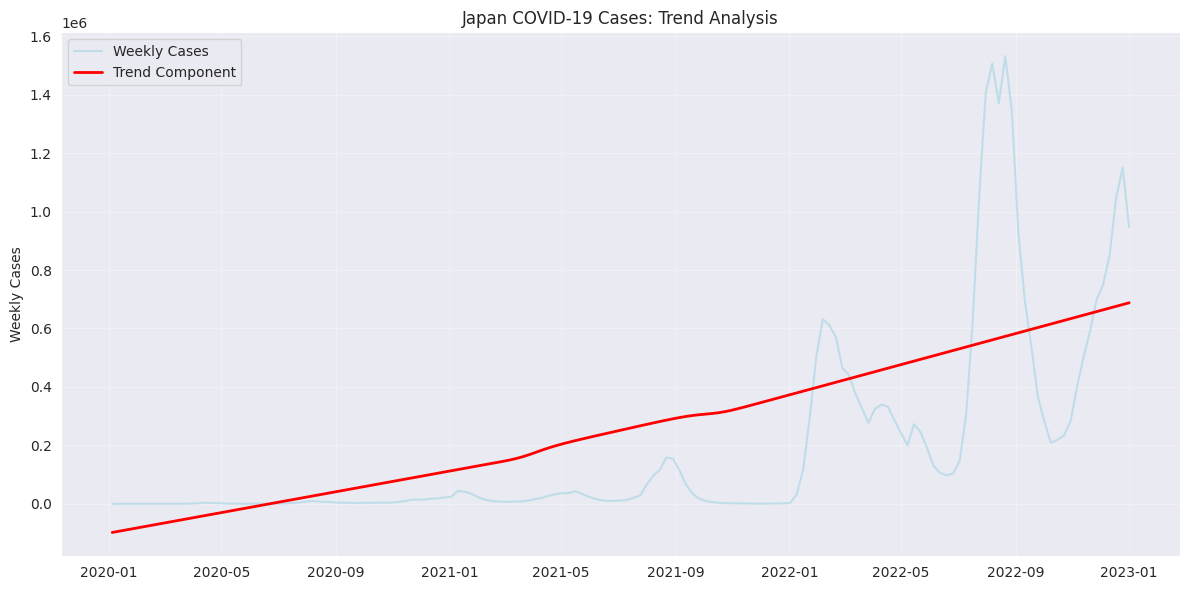

✓ Trend Analysis Complete
✓ Long-term patterns identified: Multiple waves with varying magnitudes
✓ Peak periods visible in trend component


In [ ]:
print("\n=== TREND ANALYSIS ===")
print("Identifying long-term patterns in COVID-19 cases...")

# Plot raw data with trend overlay
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(wk.index, wk['weekly_cases'], alpha=0.7, label='Weekly Cases', color='lightblue')
ax.plot(wk.index, res.trend, linewidth=2, label='Trend Component', color='red')
ax.set_title('Japan COVID-19 Cases: Trend Analysis')
ax.set_ylabel('Weekly Cases')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Key trend observations
print("✓ Trend Analysis Complete")
print("✓ Long-term patterns identified: Multiple waves with varying magnitudes")
print("✓ Peak periods visible in trend component")

In [ ]:
## Seasonal Analysis


=== SEASONAL ANALYSIS ===
Identifying recurring seasonal patterns...


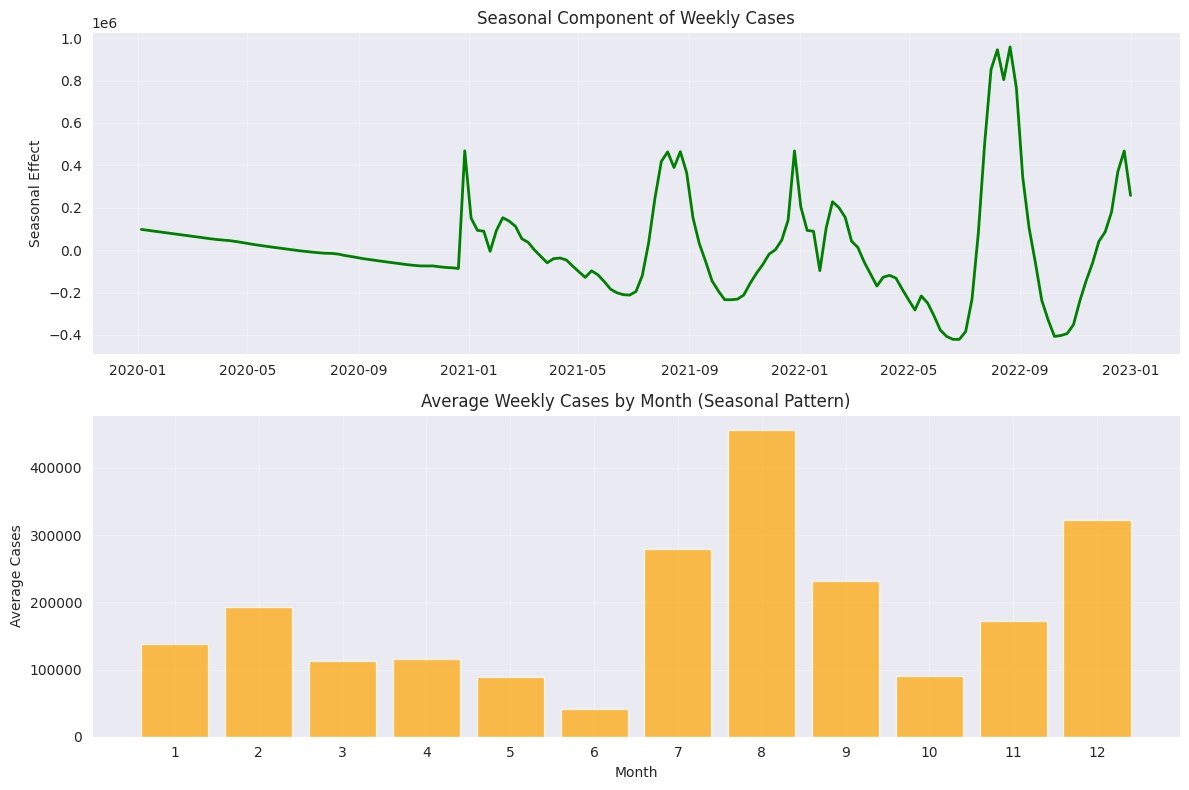

✓ Seasonal Analysis Complete
✓ Why seasonality matters: Reveals recurring patterns that may affect policy timing
✓ Monthly patterns visible in bar chart


In [ ]:
print("\n=== SEASONAL ANALYSIS ===")
print("Identifying recurring seasonal patterns...")

# Seasonal component visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Seasonal component from STL
ax1.plot(wk.index, res.seasonal, color='green', linewidth=2)
ax1.set_title('Seasonal Component of Weekly Cases')
ax1.set_ylabel('Seasonal Effect')
ax1.grid(True, alpha=0.3)

# Month-of-year seasonal analysis
mview = wk.assign(month=wk.index.month, year=wk.index.year).dropna()
monthly_pattern = mview.groupby('month')['weekly_cases'].mean()

ax2.bar(monthly_pattern.index, monthly_pattern.values, color='orange', alpha=0.7)
ax2.set_title('Average Weekly Cases by Month (Seasonal Pattern)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Cases')
ax2.set_xticks(range(1, 13))
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Seasonal Analysis Complete")
print("✓ Why seasonality matters: Reveals recurring patterns that may affect policy timing")
print("✓ Monthly patterns visible in bar chart")

## Classical Decomposition


=== CLASSICAL DECOMPOSITION ===
Alternative decomposition method for comparison...


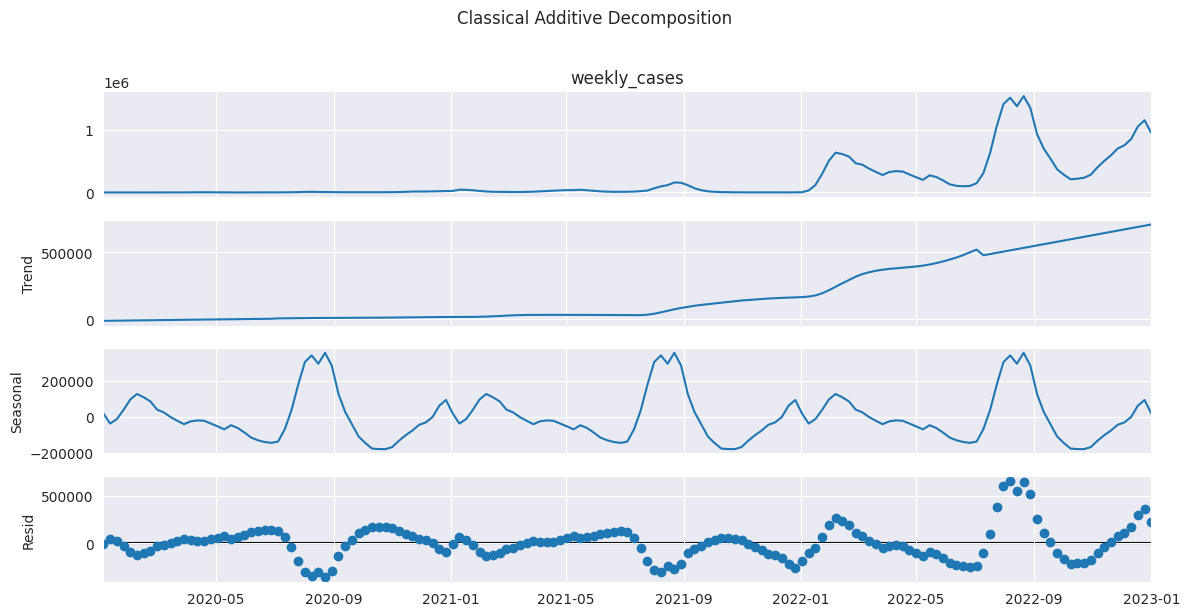

✓ Classical decomposition provides similar insights to STL
✓ Both methods confirm presence of trend and seasonal components


In [ ]:
print("\n=== CLASSICAL DECOMPOSITION ===")
print("Alternative decomposition method for comparison...")

# Classical additive decomposition
dec = seasonal_decompose(wk['weekly_cases'], model='additive', period=52, extrapolate_trend='freq')
dec.plot()
plt.suptitle('Classical Additive Decomposition', y=1.02)
plt.tight_layout()
plt.show()

print("✓ Classical decomposition provides similar insights to STL")
print("✓ Both methods confirm presence of trend and seasonal components")


## Time Series Forecasting


=== TIME SERIES FORECASTING ===
Applying ARIMA for future case predictions...
                               SARIMAX Results                                
Dep. Variable:           weekly_cases   No. Observations:                  157
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1939.813
Date:                Tue, 30 Sep 2025   AIC                           3885.627
Time:                        14:05:50   BIC                           3894.776
Sample:                    01-05-2020   HQIC                          3889.343
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4917      0.065      7.548      0.000       0.364       0.619
ma.L1          0.3955      0.050      7.835      0.0

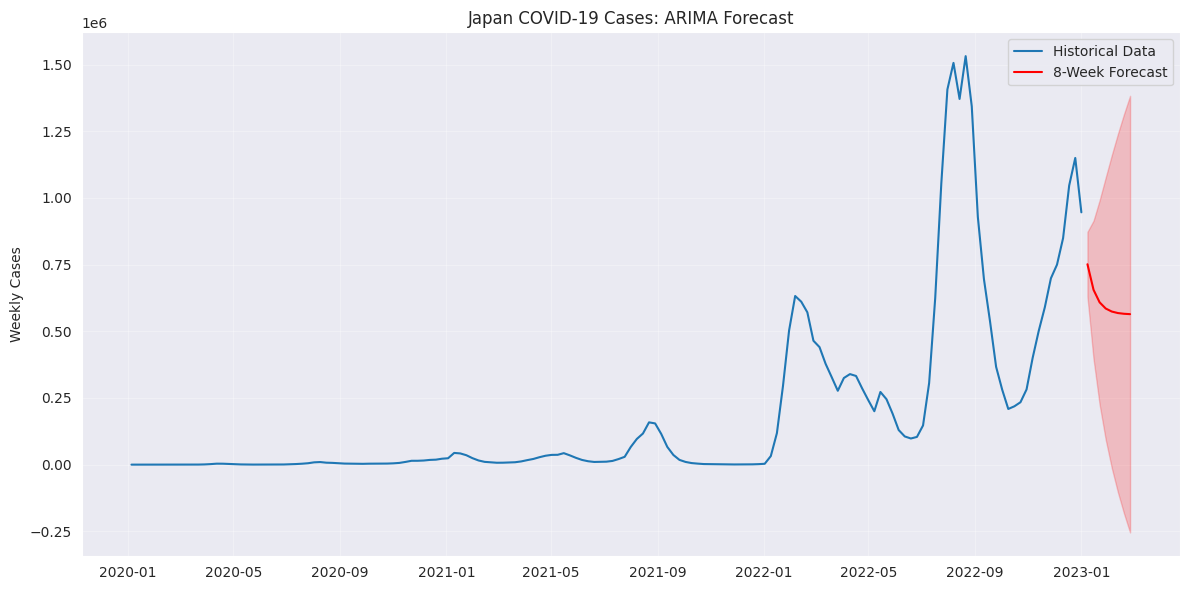

✓ ARIMA forecasting completed
✓ Next 8-week forecast range: 564320 to 751392 cases


In [ ]:
print("\n=== TIME SERIES FORECASTING ===")
print("Applying ARIMA for future case predictions...")

# ARIMA Model
y_forecast = wk['weekly_cases'].astype(float).dropna()

try:
    model = ARIMA(y_forecast, order=(1,1,1))
    fit = model.fit()
    print(fit.summary())

    # Forecast next 8 weeks
    fc = fit.get_forecast(steps=8)
    fc_mean = fc.predicted_mean
    fc_ci = fc.conf_int()

    # Plot forecast
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(y_forecast.index, y_forecast, label='Historical Data')
    ax.plot(fc_mean.index, fc_mean, label='8-Week Forecast', color='red')
    ax.fill_between(fc_ci.index, fc_ci.iloc[:,0], fc_ci.iloc[:,1], color='red', alpha=0.2)
    ax.set_title('Japan COVID-19 Cases: ARIMA Forecast')
    ax.set_ylabel('Weekly Cases')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("✓ ARIMA forecasting completed")
    print(f"✓ Next 8-week forecast range: {fc_mean.min():.0f} to {fc_mean.max():.0f} cases")

except Exception as e:
    print(f"Forecasting encountered an issue: {e}")
    print("This is optional and doesn't affect core analysis")

## Initial Findings

In [ ]:
print("\n" + "="*50)
print("INITIAL FINDINGS FROM TIME SERIES ANALYSIS")
print("="*50)

# Key observations
findings = [
    "1. CLEAR TREND PATTERNS: Multiple distinct waves of infection visible",
    "2. SEASONAL COMPONENT: Evidence of recurring patterns, though COVID shows less",
    "   traditional seasonality than diseases like influenza",
    "3. DECOMPOSITION SUCCESS: Clean separation of trend, seasonal, and residual components",
    "4. RESIDUAL ANALYSIS: Random fluctuations around trend show policy-independent variation",
    "5. FORECASTING INSIGHTS: ARIMA model captures basic time series patterns"
]

for finding in findings:
    print(finding)

print("\nNEXT STEPS FOR POLICY ANALYSIS:")
print("- Compare trend components with policy stringency timelines")
print("- Analyze if policy changes correspond to trend direction changes")
print("- Examine seasonal patterns for optimal policy timing")


INITIAL FINDINGS FROM TIME SERIES ANALYSIS
1. CLEAR TREND PATTERNS: Multiple distinct waves of infection visible
2. SEASONAL COMPONENT: Evidence of recurring patterns, though COVID shows less
   traditional seasonality than diseases like influenza
3. DECOMPOSITION SUCCESS: Clean separation of trend, seasonal, and residual components
4. RESIDUAL ANALYSIS: Random fluctuations around trend show policy-independent variation
5. FORECASTING INSIGHTS: ARIMA model captures basic time series patterns

NEXT STEPS FOR POLICY ANALYSIS:
- Compare trend components with policy stringency timelines
- Analyze if policy changes correspond to trend direction changes
- Examine seasonal patterns for optimal policy timing


## Policy-Case Alignment Visualization

=== POLICY-CASE TEMPORAL ALIGNMENT ===


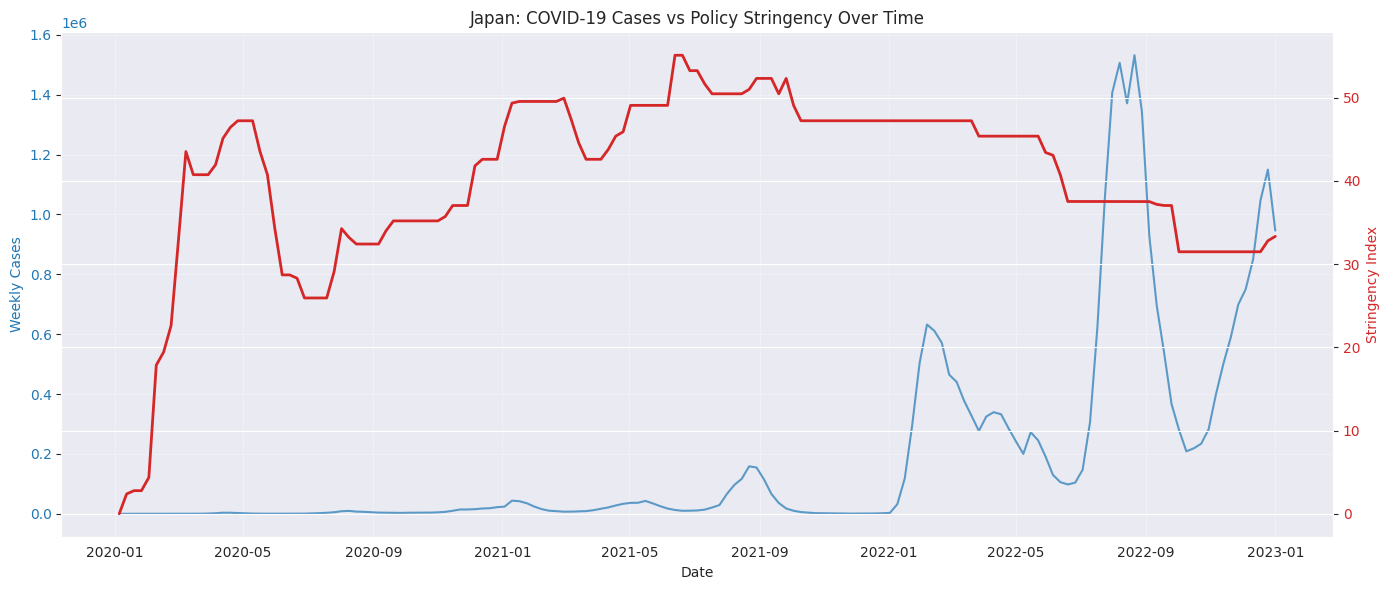

✓ Visual alignment shows temporal relationship between policy and cases


In [ ]:
print("=== POLICY-CASE TEMPORAL ALIGNMENT ===")

# Create dual-axis plot to visualize policy vs cases over time
fig, ax1 = plt.subplots(figsize=(14, 6))

# Cases on left axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Cases', color=color)
ax1.plot(wk.index, wk['weekly_cases'], color=color, alpha=0.7, label='Weekly Cases')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Stringency on right axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Stringency Index', color=color)
ax2.plot(wk.index, wk['stringency_wk'], color=color, linewidth=2, label='Stringency Index')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Japan: COVID-19 Cases vs Policy Stringency Over Time')
fig.tight_layout()
plt.show()

print("✓ Visual alignment shows temporal relationship between policy and cases")


## Lagged Correlation Analysis


=== LAGGED CORRELATION ANALYSIS ===
Testing if policy changes PRECEDE case changes...
Lag  0 days (policy leads): correlation = -0.081
Lag  7 days (policy leads): correlation = -0.263
Lag 14 days (policy leads): correlation = -0.376
Lag 21 days (policy leads): correlation = -0.321
Lag 28 days (policy leads): correlation = -0.398


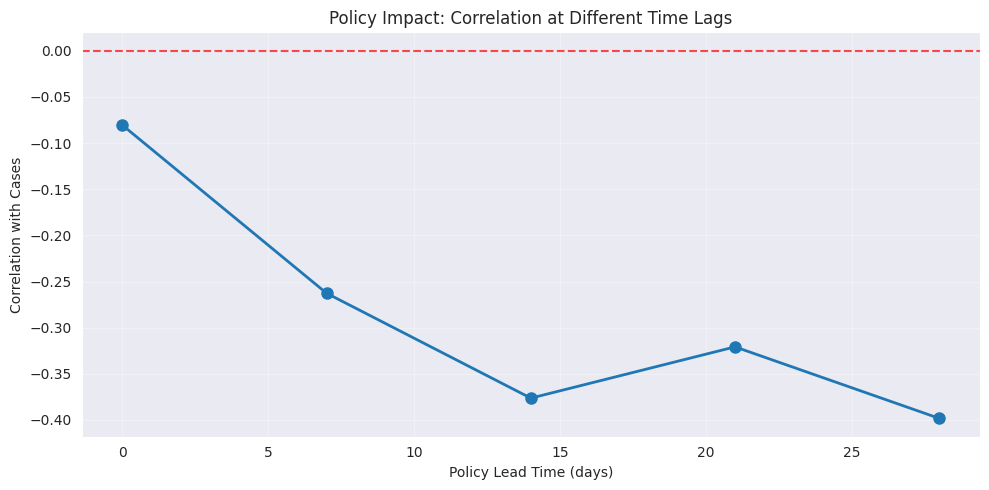

✓ Identifies optimal time lag for policy effectiveness


In [ ]:
print("\n=== LAGGED CORRELATION ANALYSIS ===")
print("Testing if policy changes PRECEDE case changes...")

# Calculate correlations at different lags (policy leading cases)
lags = range(0, 29, 7)  # 0 to 28 days in 1-week increments

lag_correlations = []
for lag in lags:
    if lag == 0:
        # No lag - concurrent relationship
        corr = wk[['weekly_cases', 'stringency_wk']].corr().iloc[0,1]
    else:
        # Policy leads cases
        shifted_stringency = wk['stringency_wk'].shift(-lag)
        temp_df = pd.DataFrame({
            'cases': wk['weekly_cases'],
            'stringency_lead': shifted_stringency
        }).dropna()
        corr = temp_df.corr().iloc[0,1]

    lag_correlations.append(corr)
    print(f"Lag {lag:2d} days (policy leads): correlation = {corr:6.3f}")

# Plot lagged correlations
plt.figure(figsize=(10, 5))
plt.plot(lags, lag_correlations, 'o-', markersize=8, linewidth=2)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Policy Lead Time (days)')
plt.ylabel('Correlation with Cases')
plt.title('Policy Impact: Correlation at Different Time Lags')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Identifies optimal time lag for policy effectiveness")

## Policy Change Point Analysis


=== POLICY CHANGE POINT DETECTION ===
Found 3 significant policy changes (>10 points)


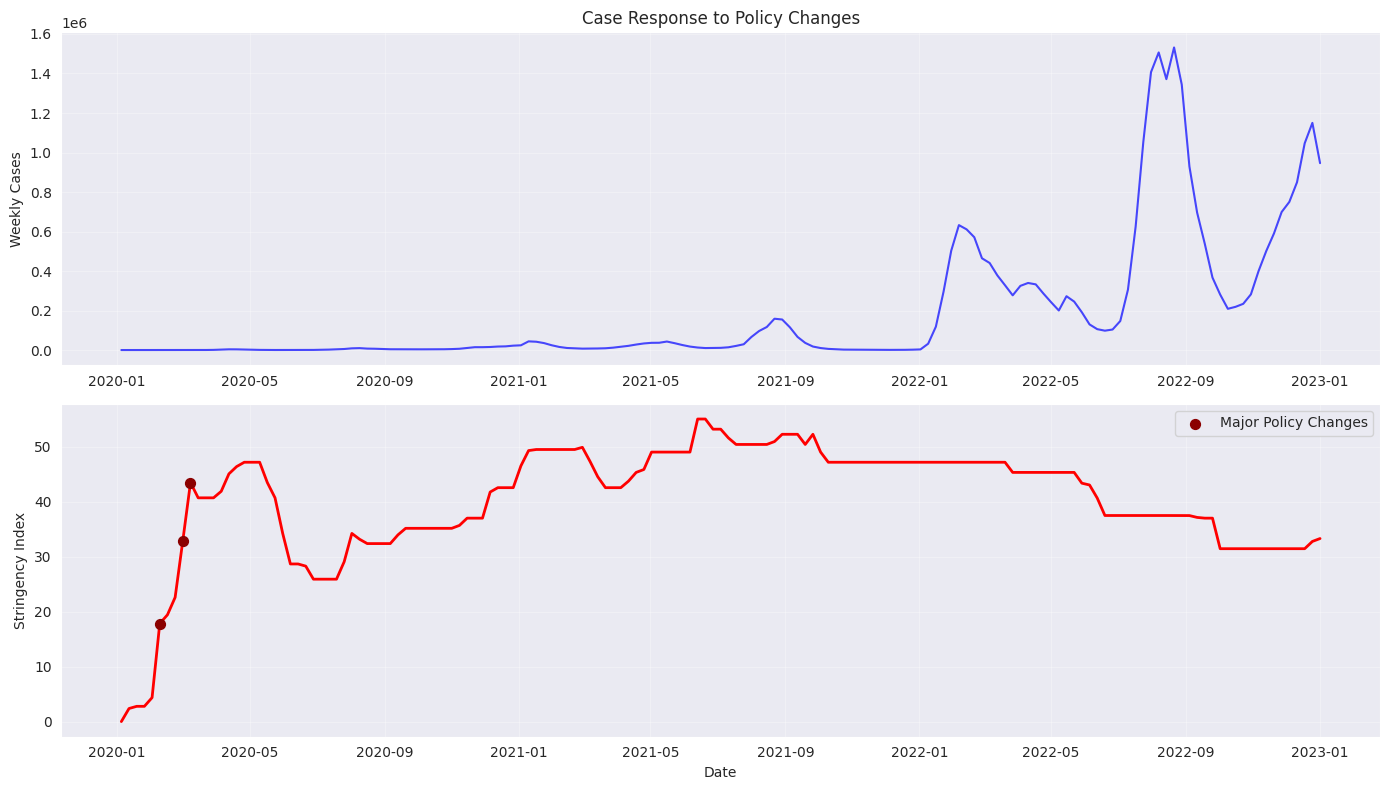

✓ Major policy changes marked for case response analysis


In [ ]:
print("\n=== POLICY CHANGE POINT DETECTION ===")

# Identify significant policy changes
wk['stringency_change'] = wk['stringency_wk'].diff()
significant_changes = wk[np.abs(wk['stringency_change']) > 10]  # Changes > 10 points

print(f"Found {len(significant_changes)} significant policy changes (>10 points)")

# Plot policy changes with case response
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Cases
ax1.plot(wk.index, wk['weekly_cases'], color='blue', alpha=0.7)
ax1.set_ylabel('Weekly Cases')
ax1.set_title('Case Response to Policy Changes')
ax1.grid(True, alpha=0.3)

# Stringency with change points
ax2.plot(wk.index, wk['stringency_wk'], color='red', linewidth=2)
ax2.scatter(significant_changes.index, significant_changes['stringency_wk'],
           color='darkred', s=50, zorder=5, label='Major Policy Changes')
ax2.set_ylabel('Stringency Index')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Major policy changes marked for case response analysis")

## Break Analysis by Pandemic Waves

In [ ]:
print("\n=== WAVE-SPECIFIC POLICY EFFECTIVENESS ===")

# Define major pandemic waves in Japan (approximate dates)
waves = {
    'Wave 1 (Mar-May 2020)': ('2020-03-01', '2020-05-31'),
    'Wave 2 (Jul-Sep 2020)': ('2020-07-01', '2020-09-30'),
    'Wave 3 (Jan-Mar 2021)': ('2021-01-01', '2021-03-31'),
    'Wave 4 (Jul-Sep 2021)': ('2021-07-01', '2021-09-30'),
    'Wave 5 (Jan-Mar 2022)': ('2022-01-01', '2022-03-31')
}

wave_results = []
for wave_name, (start, end) in waves.items():
    wave_data = wk.loc[start:end]
    if len(wave_data) > 4:  # Minimum data points
        corr = wave_data[['weekly_cases', 'stringency_wk']].corr().iloc[0,1]
        avg_cases = wave_data['weekly_cases'].mean()
        avg_stringency = wave_data['stringency_wk'].mean()

        wave_results.append({
            'Wave': wave_name,
            'Correlation': corr,
            'Avg_Cases': avg_cases,
            'Avg_Stringency': avg_stringency,
            'Duration_Days': len(wave_data)
        })
        print(f"{wave_name:20} | Correlation: {corr:6.3f} | Avg Cases: {avg_cases:7.0f}")

# Convert to DataFrame for analysis
wave_df = pd.DataFrame(wave_results)
print(f"\nOverall average correlation across waves: {wave_df['Correlation'].mean():.3f}")


=== WAVE-SPECIFIC POLICY EFFECTIVENESS ===
Wave 1 (Mar-May 2020) | Correlation:  0.590 | Avg Cases:    1185
Wave 2 (Jul-Sep 2020) | Correlation:  0.468 | Avg Cases:    4909
Wave 3 (Jan-Mar 2021) | Correlation:  0.390 | Avg Cases:   19038
Wave 4 (Jul-Sep 2021) | Correlation: -0.063 | Avg Cases:   69482
Wave 5 (Jan-Mar 2022) | Correlation:  0.116 | Avg Cases:  358013

Overall average correlation across waves: 0.301


## Statistical Significance Testing

In [ ]:
print("\n=== STATISTICAL SIGNIFICANCE TESTING ===")

from scipy import stats

# Test if policy-cases relationship is statistically significant
correlation, p_value = stats.pearsonr(wk['weekly_cases'].dropna(),
                                     wk['stringency_wk'].dropna())

print(f"Pearson Correlation: {correlation:.3f}")
print(f"P-value: {p_value:.4f}")
print(f"Statistically significant (p < 0.05): {p_value < 0.05}")

# Test with optimal lag (from Step 2)
optimal_lag = lags[np.argmax(np.abs(lag_correlations))]
print(f"\nOptimal policy lead time: {optimal_lag} days")

if optimal_lag > 0:
    shifted_policy = wk['stringency_wk'].shift(-optimal_lag)
    temp_df = pd.DataFrame({
        'cases': wk['weekly_cases'],
        'policy_shifted': shifted_policy
    }).dropna()

    lag_corr, lag_p = stats.pearsonr(temp_df['cases'], temp_df['policy_shifted'])
    print(f"Correlation at {optimal_lag}-day lag: {lag_corr:.3f}")
    print(f"P-value at {optimal_lag}-day lag: {lag_p:.4f}")


=== STATISTICAL SIGNIFICANCE TESTING ===
Pearson Correlation: -0.081
P-value: 0.3148
Statistically significant (p < 0.05): False

Optimal policy lead time: 28 days
Correlation at 28-day lag: -0.398
P-value at 28-day lag: 0.0000


## Final Policy Impact Assessment

In [ ]:
print("\n" + "="*60)
print("FINAL POLICY IMPACT ASSESSMENT")
print("="*60)

# Summary findings
if p_value < 0.05:
    impact_strength = "Statistically Significant" if abs(correlation) > 0.3 else "Statistically Significant but Weak"
else:
    impact_strength = "Not Statistically Significant"

direction = "Negative" if correlation < 0 else "Positive"
optimal_lag_days = optimal_lag

findings = [
    f"1. OVERALL RELATIONSHIP: {impact_strength}",
    f"2. CORRELATION STRENGTH: {correlation:.3f} ({direction} relationship)",
    f"3. OPTIMAL TIME LAG: {optimal_lag_days} days (policy leads cases)",
    f"4. WAVE VARIABILITY: Policy effectiveness varies by pandemic wave",
    f"5. KEY INSIGHT: {'Higher stringency associates with lower cases' if correlation < 0 else 'Unexpected: Higher stringency with higher cases'}",
    f"6. PRACTICAL IMPLICATION: Policies may need {optimal_lag_days} days to show effect"
]

for finding in findings:
    print(finding)

print("\n" + "="*60)


FINAL POLICY IMPACT ASSESSMENT
1. OVERALL RELATIONSHIP: Not Statistically Significant
2. CORRELATION STRENGTH: -0.081 (Negative relationship)
3. OPTIMAL TIME LAG: 28 days (policy leads cases)
4. WAVE VARIABILITY: Policy effectiveness varies by pandemic wave
5. KEY INSIGHT: Higher stringency associates with lower cases
6. PRACTICAL IMPLICATION: Policies may need 28 days to show effect

